<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_WState_01_Claude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ea058d9cca1b067f918364e93a94c9fbcdea46b898c7021cd19926ef3c079a24
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.5 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [160]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from math import sqrt

In [163]:
def create_w_state(n_qubits):
    """
    n개의 큐빗으로 W-State를 생성하는 함수
    """
    # 양자 회로 생성
    qc = QuantumCircuit(n_qubits)

    # 첫 번째 큐빗을 |1⟩ 상태로 설정
    qc.x(0)

    # W-State 생성을 위한 각도 계산
    for i in range(1, n_qubits):
        # i번째 큐빗에 대한 회전 각도 계산
        theta = 2 * np.arcsin(1 / sqrt(i + 1))

        # 제어 회전 연산자 적용
        qc.ry(theta, i)

        # CNOT 게이트로 얽힘 생성
        qc.cx(i, i-1)
    ###for

    return qc
###def


In [166]:
# 3-큐빗 W-State 생성
qc = create_w_state(3)

In [167]:
print("3-큐빗 W-State 회로:")
print(qc.draw())

3-큐빗 W-State 회로:
         ┌───┐    ┌───┐     
q_0: ────┤ X ├────┤ X ├─────
      ┌──┴───┴──┐ └─┬─┘┌───┐
q_1: ─┤ Ry(π/2) ├───■──┤ X ├
     ┌┴─────────┴┐     └─┬─┘
q_2: ┤ Ry(1.231) ├───────■──
     └───────────┘          


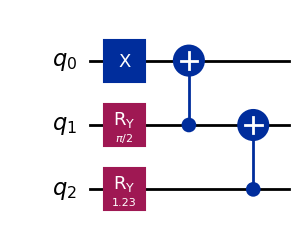

In [168]:
# 회로 시각화
qc.draw('mpl')

In [161]:
backends = Aer.backends()
backends

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [170]:
# 시뮬레이션 실행
backend = Aer.get_backend('statevector_simulator')

result = backend.run(qc, shots=1024).result()
statevector = result.get_statevector()


In [171]:
# 상태벡터 출력
print("\n상태벡터:")
print(statevector)


상태벡터:
Statevector([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.40824829+0.j, 0.        +0.j,
             0.        +0.j, 0.40824829+0.j],
            dims=(2, 2, 2))


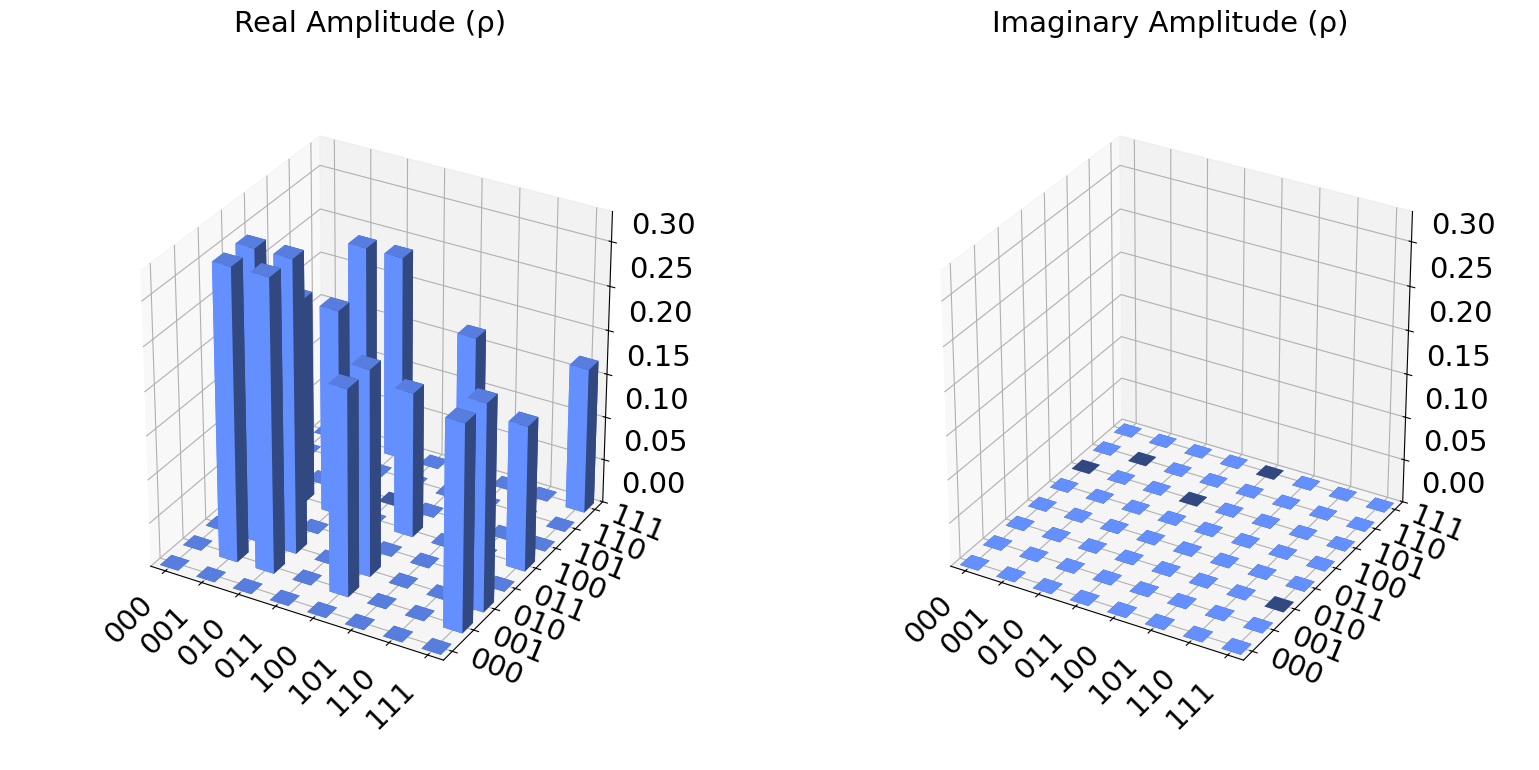

In [172]:
plot_state_city(statevector)

In [173]:
counts = result.get_counts()
print(counts)

{'001': 0.333333333333333, '010': 0.333333333333333, '100': 0.166666666666667, '111': 0.166666666666667}


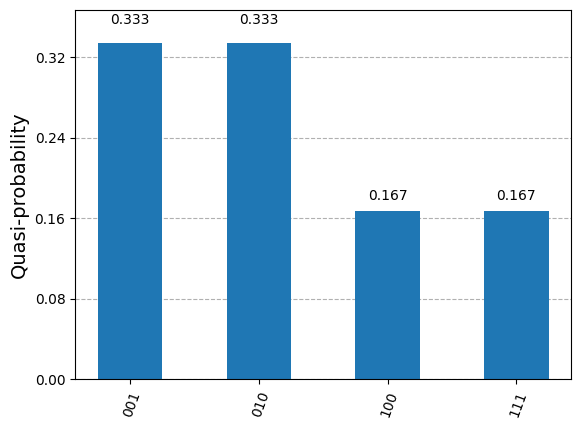

In [174]:
plot_histogram(counts)

In [175]:
# W-State 검증
def verify_w_state(statevector, n_qubits):
    """
    생성된 상태가 W-State인지 검증
    """
    # 이론적 W-State 확률 계산
    theoretical_prob = 1 / n_qubits

    # 각 기저 상태의 확률 계산
    probabilities = {}
    for i in range(2**n_qubits):
        bitstring = format(i, f'0{n_qubits}b')
        prob = abs(statevector[i])**2
        if prob > 1e-10:  # 무시할 수 있는 작은 값 필터링
            probabilities[bitstring] = prob
        ###if
    ###for

    # W-State 기저 상태만 남기기
    w_state_bases = [format(2**i, f'0{n_qubits}b') for i in range(n_qubits)]

    # 검증
    is_w_state = True
    for basis, prob in probabilities.items():
        if basis in w_state_bases:
            if abs(prob - theoretical_prob) > 1e-10:
                is_w_state = False
                break
        else:
            if prob > 1e-10:
                is_w_state = False
                break
            ###if
        ###if
    ###for

    return is_w_state, probabilities
###def

In [177]:
# W-State 검증 실행
is_valid, probs = verify_w_state(statevector, 3)
print("\nW-State 검증 결과:", "유효함" if is_valid else "유효하지 않음")
print("확률 분포:", probs)


W-State 검증 결과: 유효하지 않음
확률 분포: {'001': 0.3333333333333333, '010': 0.33333333333333315, '100': 0.16666666666666666, '111': 0.1666666666666667}
